In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("Resources\pokemon_combats_etl.csv")
df.head()

,Unnamed: 0,first_bug,first_dark,first_dragon,first_electric,first_fairy,first_fighting,first_fire,first_flying,first_ghost,...,second_rock,second_steel,second_water,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,winner
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,70,70,40,60,40,60,1
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,91,129,90,72,90,108,1
2,2,0,0,0,0,1,0,0,0,0,...,0,0,0,75,75,75,125,95,40,1
3,3,0,0,0,0,0,0,1,0,0,...,0,0,0,77,120,90,60,90,48,1
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,20,10,230,10,230,5,0


In [2]:
# Split our preprocessed data into our features and target arrays
df.drop('Unnamed: 0', axis=1, inplace=True)
X = df.drop("winner", axis=1)
y = df["winner"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [3]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Create the random forest classifier instance
# Fit the model

model = RandomForestClassifier(n_estimators=500, random_state=78).fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision: {precision_score(y_test, predictions)}")
print(f"Recall: {recall_score(y_test, predictions)}")

Accuracy: 0.93784
Precision: 0.9420489296636085
Recall: 0.9393200182954718
--- 17.72344160079956 seconds ---


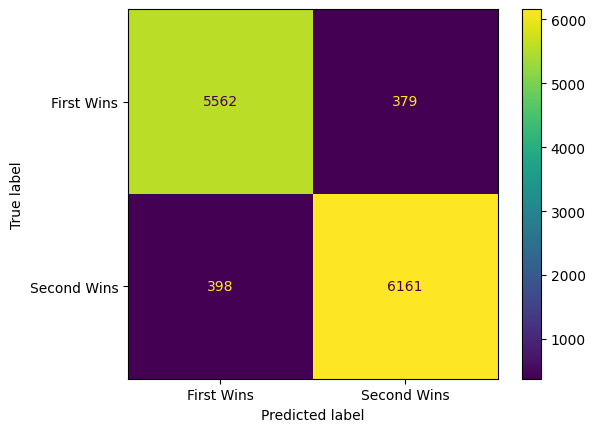

In [5]:
# Displaying results
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predictions), display_labels=["First Wins", "Second Wins"])
disp.plot()

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

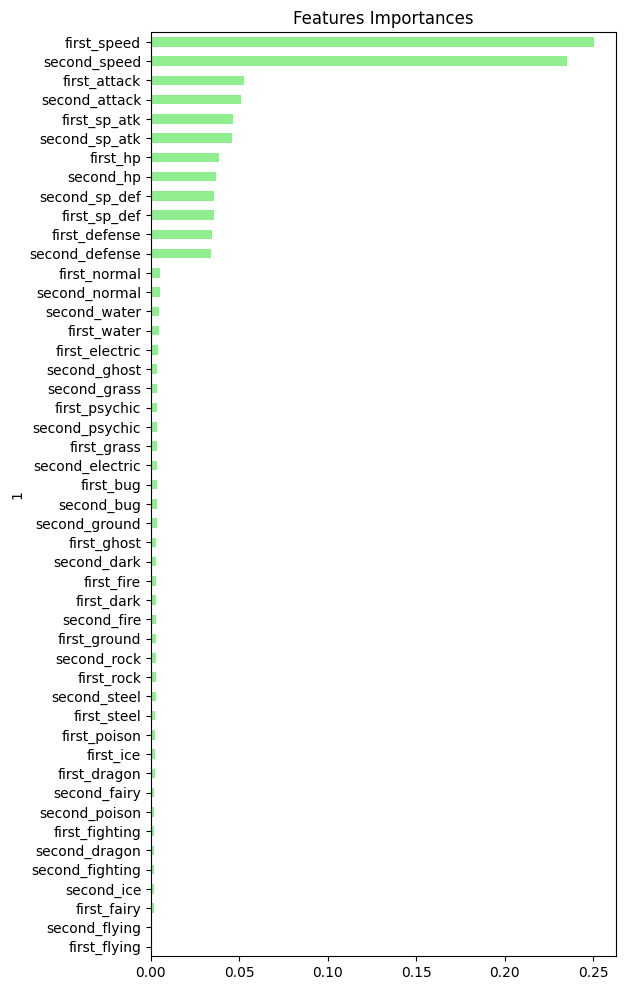

In [6]:
# Create a DataFrame to store feature importances
importances_df = pd.DataFrame(sorted(zip(model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)

# Sort the features by importance and plot them
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title='Features Importances', legend=False, figsize=(6, 12))

In [7]:
columns = list(df.columns)

# Extract the names of the top 50% most important features
sorted_importances_half = importances_df.index.to_list()[:24]

# Find the columns of the most important features
important_indices_h = [columns.index(feature) for feature in sorted_importances_half]

# Create training and testing sets with only the important features
important_train_features_h = X_train_scaled[:, important_indices_h]
important_test_features_h = X_test_scaled[:, important_indices_h]

In [8]:

# Train the expanded model on only the important features
model.fit(important_train_features_h, y_train);

# Make predictions on test data
predictions_h = model.predict(important_test_features_h)

# Performance metrics
print(f"Accuracy: {accuracy_score(y_test, predictions_h)}")
print(f"Precision: {precision_score(y_test, predictions_h)}")
print(f"Recall: {recall_score(y_test, predictions_h)}")

Accuracy: 0.94248
Precision: 0.9470300061236987
Recall: 0.9431315749352035
--- 15.504566192626953 seconds ---


In [9]:
# Extract the names of the most important features
sorted_importances_quarter = importances_df.index.to_list()[:12]

# Find the columns of the most important features
important_indices_q = [columns.index(feature) for feature in sorted_importances_quarter]

# Create training and testing sets with only the important features
important_train_features_q = X_train_scaled[:, important_indices_q]
important_test_features_q = X_test_scaled[:, important_indices_q]

In [10]:
# Train the expanded model on only the important features
model.fit(important_train_features_q, y_train)

# Make predictions on test data
predictions_q = model.predict(important_test_features_q)

# Performance metrics
print(f"Accuracy: {accuracy_score(y_test, predictions_q)}")
print(f"Precision: {precision_score(y_test, predictions_q)}")
print(f"Recall: {recall_score(y_test, predictions_q)}")

Accuracy: 0.94568
Precision: 0.9523076923076923
Recall: 0.9437414239975606
--- 17.804383516311646 seconds ---


In [11]:
rf = RandomForestClassifier(random_state = 78)
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 78,
 'verbose': 0,
 'warm_start': False}


In [20]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 5)]

# Number of features to consider at every split
max_features = ['log2', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 100, num = 6)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [50, 60, 70, 80, 90, 100, None],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [1000, 1250, 1500, 1750, 2000]}


In [21]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 20 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=78, n_jobs = -1)

# Fit the random search model
rf_random.fit(important_train_features_q, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [14]:
rf_random.best_params_

{'n_estimators': 1750,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [15]:
best_random = rf_random.best_estimator_
predictions_rs = best_random.predict(important_test_features_q)

print(f"Accuracy: {accuracy_score(y_test, predictions_rs)}")
print(f"Precision: {precision_score(y_test, predictions_rs)}")
print(f"Recall: {recall_score(y_test, predictions_rs)}")


Accuracy: 0.9472
Precision: 0.9530026109660574
Recall: 0.9460283579813996
--- 2.7940962314605713 seconds ---


In [16]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [80, 90, 100],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [5, 10],
    'n_estimators': [1600, 1700, 1800]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [17]:
grid_search.fit(important_train_features_q, y_train)
grid_search.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1600}

In [19]:
best_grid = grid_search.best_estimator_
predictions_grid = best_grid.predict(important_train_features_q)

print(f"Accuracy: {accuracy_score(y_test, predictions_grid)}")
print(f"Precision: {precision_score(y_test, predictions_grid)}")
print(f"Recall: {recall_score(y_test, predictions_grid)}")

ValueError: Found input variables with inconsistent numbers of samples: [12500, 30000]

In [ ]:
grid_search.fit(important_train_features_q, y_train)
grid_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1600}